In [4]:
# Classification accuracy
# Read the data in Pandas' data frame
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header = None, names = col_names)

In [5]:
# print first five rows of pima
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [8]:
# Split X and y into traing and test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
# train the logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [11]:
# make class predictions for testing set
y_pred_class = logreg.predict(X_test)

In [13]:
# evaluate accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.692708333333


In [14]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
dtype: int64

In [15]:
#calculate the percentage of ones
y_test.mean()

0.32291666666666669

In [16]:
#calculate the percentage of zeros
1- y_test.mean()

0.67708333333333326

In [17]:
#  calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1- y_test.mean())

0.67708333333333326

In [19]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
dtype: float64

In [20]:
# print the first 25 true and predicted responses
print 'True:', y_test.values[0:25]
print 'Pred:', y_pred_class[0:25]

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
# Confusion Matrix: Table that describes the performance of a classification model
print metrics.confusion_matrix(y_test, y_pred_class)

[[118  12]
 [ 47  15]]


In [30]:
# print the first 25 true and predicted responses
print 'True:', y_test.values[0:25]
print 'Pred:', y_pred_class[0:25]

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
# save the confusion matrix and slice it into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[1, 0]
FN = confusion[0, 1]

In [42]:
# Metrics computed from a confusion matrix
# 1. Classification accuracy : How often is the classifier correct?
print (TP+TN)/float(TP+TN+FP+FN)
print metrics.accuracy_score(y_test, y_pred_class)

0.692708333333
0.692708333333


In [43]:
# 2. Classification error: How often is the classifier inaccurate?
# Also known as "Misclassification Rate"
print (FP+FN)/float(TP+TN+FP+FN)
print 1 - metrics.accuracy_score(y_test, y_pred_class)

0.307291666667
0.307291666667


In [48]:
# Sensitivity: When actual is positive, how often is the prediction accurate?
# How "sensitive" is the classifier to detecting positive instances?
# Also known as "True Positive Rate" or "Recall"
print TP / float(TP + FP)
print metrics.recall_score(y_test, y_pred_class)

0.241935483871
0.241935483871


In [47]:
# Specificity: When the actual value is negative, how often is the prediction correct?
# How "specific" (or "selective") is the classifier in predicting positive instances?
print (TN / float(TN + FN))

0.907692307692


In [62]:
# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print FP/ float(TP+FP)

0.758064516129


In [56]:
# Precision: When a positive value is predicted, how often is the prediction correct?
# How "precise" is the classifier when predicting positive instances?
print TP/ float(TP+FN)
print metrics.precision_score(y_test, y_pred_class)

0.555555555556
0.555555555556


In [65]:
# Adjusting the classification threshold
# print the first 10 predicted response
logreg.predict(X_test)[1:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1])

In [66]:
# print the first 10 probabilities
logreg.predict_proba(X_test)[1:10, :]

array([[ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [67]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[1:10, 1]

array([ 0.28356344,  0.28895886,  0.4141062 ,  0.15896027,  0.17065156,
        0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [68]:
y_pred_prob = logreg.predict_proba(X_test)[: , 1]

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

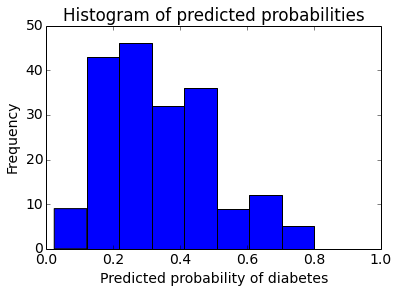

In [72]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [76]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.3)[0]

In [77]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [78]:
# print the first 10 predicted class
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [79]:
# previous confusion matrix (default threshold of 0.5)
print confusion

[[118  12]
 [ 47  15]]


In [81]:
# new confusion matrix threshold 0.3
print metrics.confusion_matrix(y_test, y_pred_class)

[[80 50]
 [16 46]]


In [83]:
# sensitivity has increased (used to be 0.24)
print 46 / float(46 + 16)
print metrics.recall_score(y_test, y_pred_class)

0.741935483871
0.741935483871


In [84]:
# specificity has decreased (used to be 0.91)
print 80 / float(80 + 50)

0.615384615385


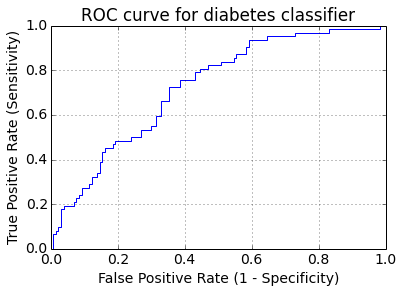

In [89]:
# ROC Curves and Area Under the Curve (AUC)
# important, first argument is true values, second argument is predicted probability
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [90]:
# define a function that accepts threshold and print sensitivity and specificity
def evaluate_threshold(threshold):
    print 'Sensitivity:', tpr[thresholds>threshold][-1]
    print 'Specificity:', 1 - fpr[thresholds>threshold][-1]

In [91]:
evaluate_threshold(0.5)

Sensitivity: 0.241935483871
Specificity: 0.907692307692


In [92]:
evaluate_threshold(0.3)

Sensitivity: 0.741935483871
Specificity: 0.615384615385


In [93]:
# AUC is the percentage of the ROC plot that is underneath the curve
print metrics.roc_auc_score(y_test, y_pred_prob)

0.724565756824


In [94]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv =10, scoring='roc_auc').mean()

0.73782336182336183